In [1]:
import pandas as pd
import pickle
from tensorflow.keras.models import load_model
import json
import numpy as np
from sklearn.metrics import accuracy_score

from weights import utils as weights_utils
from models import utils as model_utils

2024-01-14 11:52:46.689938: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-14 11:52:46.689960: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-14 11:52:46.689979: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-14 11:52:46.694121: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-14 11:52:47.153691: W tensorflow/compiler/

In [2]:
WINDOW_SIZE = 60
raw_test_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/data/raw/test_1m_2021-07-01_2021-12-31.csv", index_col=0)
raw_test_df.index = pd.to_datetime(raw_test_df.index)

with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/labels/all_labels_test_1m_2021-07-01_2021-12-31.pkl", 'rb') as file:
    labels_test_dict = pickle.load(file)
Y_test_dict = {}
for label_name in labels_test_dict.keys():
    Y_test_dict[label_name] = model_utils.get_Y(labels_test_dict[label_name], WINDOW_SIZE)

with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/feat/test_probs.pkl", 'rb') as file:
    test_probs = pickle.load(file)

Accuracy: 0.78


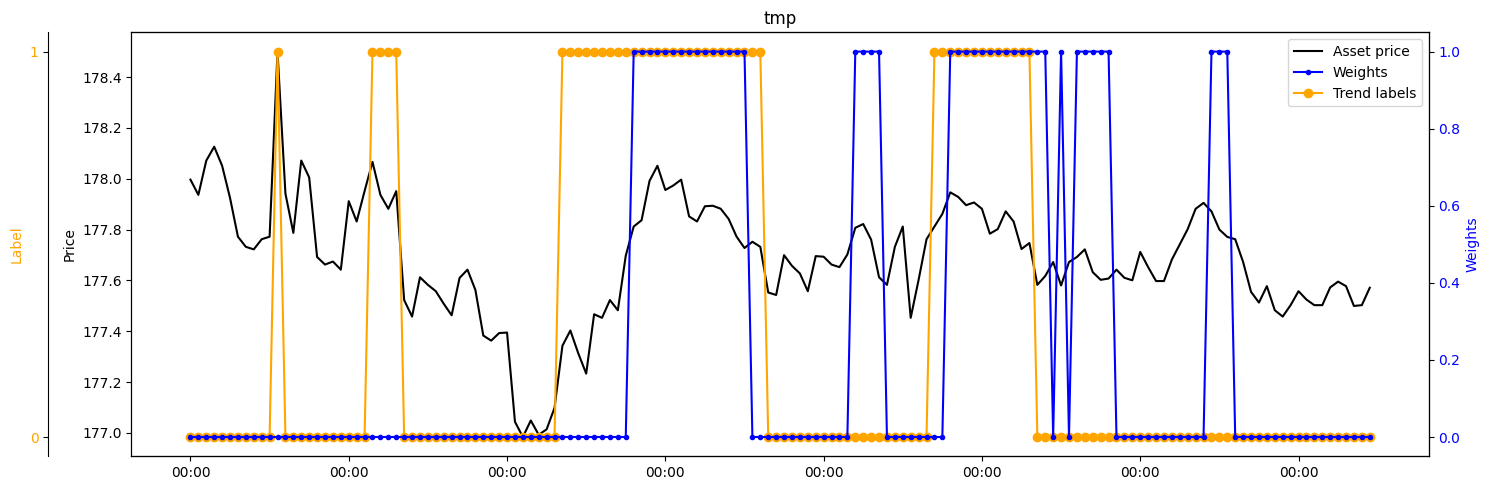

In [17]:
start = -400
end = -250	
probs = test_probs['D-features;L-ct_three_state;W-trend_interval_return;M-transformer']['probs']
predictions = np.where(probs > 0.5, 1, 0)
predictions_df = pd.DataFrame(predictions, index=Y_test_dict['ct_three_state'].index, columns=['Predictions'])
accuracy = accuracy_score(Y_test_dict['ct_three_state'].iloc[start:end].values, predictions_df.iloc[start:end])
print("Accuracy:", accuracy)
weights_utils.plot_weights('tmp', raw_test_df['Close'].iloc[start:end], Y_test_dict['ct_three_state'].iloc[start:end], predictions_df.iloc[start:end])